<a href="https://colab.research.google.com/github/oli2tup/LunarLander_Game_Automation/blob/main/Basic_Neuron_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LAB 3
# Basic Neural Network from scratch
# Basic Neuron Class

In [ ]:
import math
import random
import csv
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
class NeuronClass:

  # https://docs.python.org/3/library/random.html
  # generating a random weight between -1.0 > 1.0
  def __init__(self):
    random.seed(12)

    self.input_neurons = 2
    self.hidden_neurons = 15
    self.output_neurons = 2

    # solution not dynamic as the wieght arrays and computatino of weight arrays
    # will need to be adapted to increase neurons, currently at 4 

    # two input weight lists for the two input neurons, length of the hidden neurons
    # [w11, w12, w13, w14], [w21, w22, w23, w24]
    self.i_w1 = [random.uniform(-1,1) for i in range(self.hidden_neurons)]
    self.i_w2 = [random.uniform(-1,1) for i in range(self.hidden_neurons)]

    # 15 hidden weight lists for the 15 neurons, length of the output neurons
    self.hidden_weights_toOutput = []

    for i in range(self.hidden_neurons):
      self.hidden_weights_toOutput.append([random.uniform(-1,1) for i in range(self.output_neurons)])

    # bias weights
    # need different neurons at hidden for the bias
    self.biw = random.uniform(-1, 1)

    self.epoch = 325 # number of interations
    self.lamda = 0.4
    self.etha = 0.3
    self.lr = 0.0125 # learning rate
    self.alpha = 0.9 # for momentum
    

  # sigmoid derivatite for the gradient values
  def sigmoid_derivative(self, x):
    return (x * self.lamda) * (1 - x)

  # https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python
  # signmoid activation for the v values
  def sigmoid_activation(self, x):
    return 1 / (1 + math.exp(- x * self.lamda))

  def dot_product(self, list1, list2):
    return sum([i*j for (i, j) in zip(list1, list2)])

  def forward_propagation(self, input):
    
    # Feed Forward
    hidden_input = []
    output = []

    # sigmoid(weight * input)
    for a in range(self.hidden_neurons):
      
      # if at the first hidden neuron add (biasweight * input[0]) to the v_value
      if a == 0:
        v = input[0] * self.i_w1[a] + input[1] * self.i_w2[a] + self.biw * input[0]
      else:
        v = input[0] * self.i_w1[a] + input[1] * self.i_w2[a]
      
      # appending the sigmoid_activation of v value to the Hidden_input array
      # so can be used for backpropagation
      hidden_input.append(self.sigmoid_activation(v))
    
    # temp lists to store the weights belonging to output[0] and output[1]
    temp1 = []
    temp2 = []

    for a in self.hidden_weights_toOutput:
      temp1.append(a[0])
      temp2.append(a[1])
    
    # sigmoid derivative of the dot product of hidden input and each temp list
    output.append(self.sigmoid_activation(self.dot_product(temp1, hidden_input)))
    output.append(self.sigmoid_activation(self.dot_product(temp2, hidden_input)))

    return output, hidden_input
  
  # take in the activation values at the hidden neurons, and the predicted output
  # from the forward propagation
  def back_prop(self, input, output, p_output, hidden_activation, epoch):

    # saving the delta weight at each iteration to speed the convergence
    # for momentum
    d_outputWeights_prev = []
    d_hiddenWeight_prev = []
    
    # lists to save values needed for later 
    o_gradients = [] # output gradients 
    h_gradients = [] # hidden gradients
    d_outputWeights = []  # Delta output weights
    d_hiddenWeights = []  # Delta hidden weights
    error = [] # keep our error
    error_hidden = [0 for i in range(self.hidden_neurons)] # 0 will be added to

    # calculate our error at the output
    for output1, output2 in zip(output ,p_output):
      error.append(output1 - output2)

    # calculate the output gradients and delta output weights
    for e in range(len(output)):
      o_gradients.append(self.sigmoid_derivative(output[e]))
      d_outputWeights.append(self.etha * o_gradients[e] * error[e])

    # calculate the error at the hidden_layers
    for f in range(len(hidden_activation)):
      for g in range(len(d_outputWeights)):
        error_hidden[f] += d_outputWeights[g] * hidden_activation[f]

    # calculate the local hidden gradients 
    for h in range(len(hidden_activation)):
      h_gradients.append(self.sigmoid_derivative(hidden_activation[h]))

    # finding the delta hidden weights
    for e1 in range(self.hidden_neurons):
      for f1 in range(len(input)):
        v =  self.etha * h_gradients[e1] * input[f1]
        d_hiddenWeights.append(v)

    #saving the weights 
    d_hiddenWeight_prev = d_hiddenWeights
    d_outputWeights_prev = d_outputWeights

    if epoch == 0:

    # updating before adding momentum at the first pass
    # updating the first 15 weights in the input layer
      for g1 in range(len(self.i_w1)):
        self.i_w1[g1] += d_hiddenWeights[g1]  * self.lr
        
        # removing the first weights
        d_hiddenWeights.pop(g1)


      # updating the next weights at input weights
      for k in range(len(self.i_w2)):
        self.i_w2[k] += d_hiddenWeights[k] * self.lr

      # updating the hidden weights to ouput
      for l in range(self.hidden_neurons):
        self.hidden_weights_toOutput[l][0] += d_outputWeights[0] * self.lr
        self.hidden_weights_toOutput[l][1] += d_outputWeights[1] * self.lr
  
    else: 
      
      # updating the weights with momentum 
      for g2 in range(len(self.i_w1)):
        self.i_w1[g2] += (d_hiddenWeights[g2] + (d_hiddenWeight_prev[g2] * self.alpha))  * self.lr 
        
        d_hiddenWeights.pop(g2)

      for k in range(len(self.i_w2)):
        self.i_w2[k] += (d_hiddenWeights[k] + (d_hiddenWeight_prev[k] * self.alpha)) * self.lr
        
      # updating the hidden weights
      for l in range(self.hidden_neurons):

        self.hidden_weights_toOutput[l][0] += (d_outputWeights[0] * self.lr) + (
            d_outputWeights_prev[0] * self.alpha)
          
        self.hidden_weights_toOutput[l][1] += (d_outputWeights[1] * self.lr) + (
            d_outputWeights_prev[1] * self.alpha)
      
      # clearing the delta hidden and delta output weights so they can be used
      # for (t + 1 ) epoch, could this be done better? 
      d_hiddenWeight_prev.clear()
      d_outputWeights_prev.clear()
      
    return p_output

  # training function
  def train(self, t_csv):
    
    rmse_list = []

    # going through the forward and back prop lenght of epoch
    for i in range(self.epoch):

      with open(t_csv, 'r') as data_file:
        #print("a")
        csv_reader = reader(data_file, delimiter=',')
        #print("b")
        
        # error calulation
        total_error = 0
        total = i 
        for row in csv_reader: 
        
          # converting the row into a float, then passing the correct index 
          # as inputs and outputs 

          input = [float(row[0]), float(row[1])]
          output = [float(row[2]), float(row[3])]

          
          # forward and back propagation
          p_output, hidden_activation = self.forward_propagation(input)
          p_output = self.back_prop(input, output, p_output, hidden_activation, i)

          # calulation the error at the epochs 
          error1 = float(row[2]) - p_output[0]
          error2 = float(row[3]) - p_output[1]

          e = (error1 + error2) * 0.5 
          e = e ** 2
          total_error += e

        rmse = math.sqrt(total_error / (total + 1) ) 
        rmse_list.append(rmse)
        if i % 10 == 0:print('Error at epoch', i, ":", rmse)
    
    plt.plot(np.arange(1, i + 2), np.array(rmse_list)) 
    return p_output

  def test(self, test_csv):

    rmse_list = []

    with open(test_csv, 'r') as data_file:
      csv_reader = reader(data_file, delimiter=',')
      
      # error calulation
      total_error = 0
      total  = 0 
      for row in csv_reader: 
      
        # converting the row into a float, then passing the correct index 
        # as inputs
        input = [float(row[0]), float(row[1])]
        
        # forward propagation
        p_output, hidden_activation = self.forward_propagation(input)

        # calulation the error at the epochs 
        error1 = float(row[2]) - p_output[0]
        error2 = float(row[3]) - p_output[1]

        e = (error1 + error2) * 0.5 
        e = e ** 2

        total += 1
        total_error += e

        rmse = math.sqrt(total_error / (total + 1) ) 
        rmse_list.append(rmse)
        print("Error:", rmse)

  # saving the weightsin a csv file     
  def save_weights(self):
    final_weights = []

    final_weights.append(self.i_w1)
    final_weights.append(self.i_w2)

    final_weights.append(self.hidden_weights_toOutput)

    final_weights.append(self.biw)

    print(final_weights)

In [ ]:
# checking the functions in the class 
k = NeuronClass()

Error at epoch 0 : 22.707124326327232
Error at epoch 10 : 3.7888221621493465
Error at epoch 20 : 2.737920797688684
Error at epoch 30 : 2.2522667938449112
Error at epoch 40 : 1.957905224608775
Error at epoch 50 : 1.7552027196372981
Error at epoch 60 : 1.60472070475773
Error at epoch 70 : 1.4873069550073477
Error at epoch 80 : 1.3923907654196712
Error at epoch 90 : 1.3135980145028918
Error at epoch 100 : 1.2468265062730186
Error at epoch 110 : 1.189300719767739
Error at epoch 120 : 1.1390666799633675
Error at epoch 130 : 1.0947036114664854
Error at epoch 140 : 1.055150360912832
Error at epoch 150 : 1.0195962356397539
Error at epoch 160 : 0.9874097881439627
Error at epoch 170 : 0.9580908821979905
Error at epoch 180 : 0.931237549138595
Error at epoch 190 : 0.9065225269298974
Error at epoch 200 : 0.8836763071898912
Error at epoch 210 : 0.8624746589119333
Error at epoch 220 : 0.8427292956942809
Error at epoch 230 : 0.824280791368478
Error at epoch 240 : 0.8069931306887512
Error at epoch 250 

[0.5579866100621205, 0.4671161342111531]

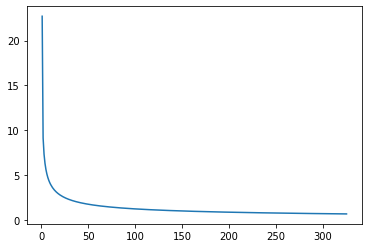

In [ ]:
k.train('/content/drive/MyDrive/NN_data/train_data.csv')

In [ ]:
k.test('/content/drive/MyDrive/NN_data/test_data.csv')

Streaming output truncated to the last 5000 lines.
Error: 0.1008894832864136
Error: 0.10088217252562044
Error: 0.10087497048376523
Error: 0.10086790159310831
Error: 0.10086099027780138
Error: 0.10085426095354329
Error: 0.10084773802717652
Error: 0.1008414458962246
Error: 0.10083540894837056
Error: 0.10082965156087649
Error: 0.10082419809994413
Error: 0.10081907292001686
Error: 0.10081430036302302
Error: 0.10080990475756077
Error: 0.10080591041802457
Error: 0.10080234164367365
Error: 0.1007992227176423
Error: 0.10079657790589257
Error: 0.10079443145610935
Error: 0.10079280759653818
Error: 0.10079173053476603
Error: 0.10079122445644538
Error: 0.10079131352396185
Error: 0.10079071367686916
Error: 0.10078945814579159
Error: 0.10078758013010543
Error: 0.10078511280005528
Error: 0.10078208929875852
Error: 0.10077854274409886
Error: 0.10077450623050928
Error: 0.10077001283064473
Error: 0.10076509559694526
Error: 0.10075978756308966
Error: 0.10075412174534008
Error: 0.10074813114377787
Error: 

In [ ]:
# Final weights 
k.save_weights()

[[30.15416666719628, 29.796635622464148, 29.465894932787663, 29.62167187614609, 29.30882649162899, 29.58107716913609, 29.518433039992686, 29.503239357766848, 29.82536273796265, 29.77737253508435, 29.388315030963895, 29.599594437737395, 29.615271808197207, 29.31809186761506, 29.244706614781208], [27.96387922659494, 27.387484381338187, 27.70784273950865, 27.553930583664574, 27.863624213495058, 27.59394731962732, 27.655064801304942, 27.671277020321757, 27.36041870394738, 27.405615397193152, 27.784865644619536, 27.57657717558063, 27.560146025898415, 27.855253002014596, 27.929182675122036], [[-0.6887755289623272, -0.0585807228840166], [-0.6436917993580907, -0.2799125590076435], [0.32907309528633866, -0.5779456907541255], [0.47983817644478555, -0.8022873130621755], [-0.5714026161027062, 0.7264013491159302], [-0.11279340614523335, -0.0673135231169639], [0.27811115248580387, 0.048542542352214384], [-0.14466801910676744, -0.8440051838105367], [0.5388240534385014, 1.0299238183421653], [1.0387767